## 계층적 군집(2)
###### kaggle customer 데이터 셋 적용
#### #01. 패키지 참조

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
import numpy as np
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

#### #02. 데이터 가져오기

In [2]:
origin = read_excel("https://data.hossam.kr/G02/customer.xlsx")
print(origin.info())
origin.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    200 non-null    int64 
 1   성별      200 non-null    object
 2   나이      200 non-null    int64 
 3   연수입     200 non-null    int64 
 4   지출점수    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,고객ID,성별,나이,연수입,지출점수
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### #03. 데이터 전처리
1. 필요한 변수만 추출

In [3]:
x = origin.filter(['나이', '연수입', '지출점수'])
x.head()

,나이,연수입,지출점수
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


2. 데이터 표준화

In [4]:
scaler = StandardScaler()
n_data = scaler.fit_transform(x)
#n_data[:5]
ndf = DataFrame(n_data, columns=x.columns)
ndf.head()

,나이,연수입,지출점수
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [5]:
ndf['성별'] = origin['성별'].map({'Male':0, 'Female':1})
ndf

,나이,연수입,지출점수,성별
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,1
197,-0.491602,2.497807,0.923953,0
198,-0.491602,2.917671,-1.250054,0


3. 데이터 분포 확인

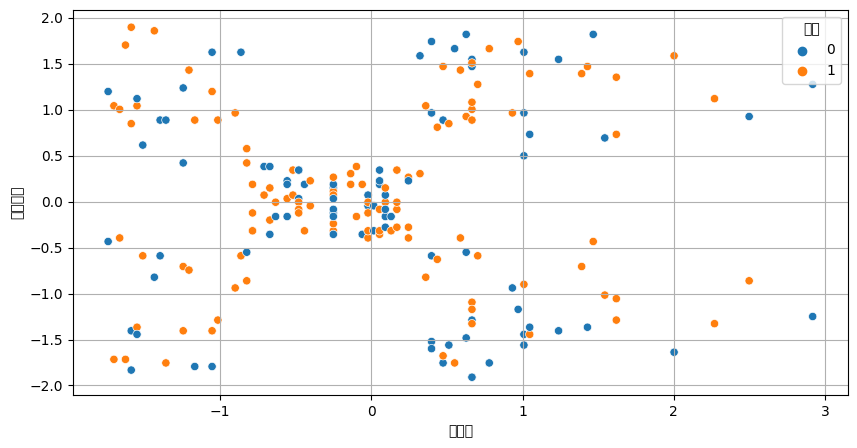

In [6]:
plt.figure(figsize=(10, 5))
#sb.scatterplot(x=n_data[:, 0], y=n_data[:, 1])
sb.scatterplot(data=ndf, x='연수입', y='지출점수', hue='성별')
plt.grid()
plt.show()
plt.close()

#### #04. 계층 군집 수행
1. scipy 패키지

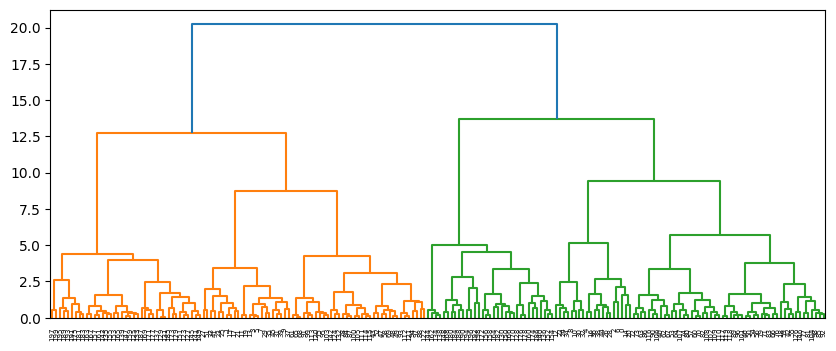

In [7]:
#lnk = linkage(n_data, method='ward')
lnk = linkage(ndf, method='ward')
plt.figure(figsize=(10, 4))
dendrogram(lnk, show_leaf_counts=True)
plt.show()
plt.close()

2. sklearn 패키지

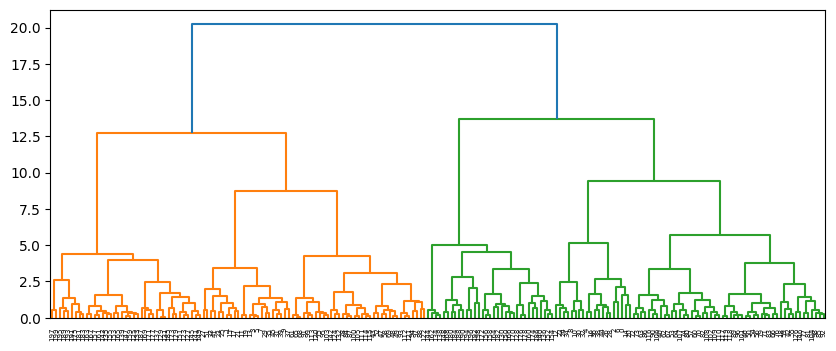

In [8]:
ac = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward',
compute_distances=True)
#clustering = ac.fit(n_data)
clustering = ac.fit(ndf)
counts = np.zeros(clustering.children_.shape[0])
n_samples = len(clustering.labels_)

for i, merge in enumerate(clustering.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count
linkage_matrix = np.column_stack(
[clustering.children_, clustering.distances_, counts]
).astype(float)
plt.figure(figsize=(10, 4))
dendrogram(linkage_matrix)
plt.show()
plt.close()

군집수를 5로 제한했을 경우 분류 결과값

In [9]:
clustering.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 1, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int64)

분류 결과를 데이터프레임과 병합

In [10]:
origin['labels'] = clustering.labels_
origin.head()

,고객ID,성별,나이,연수입,지출점수,labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


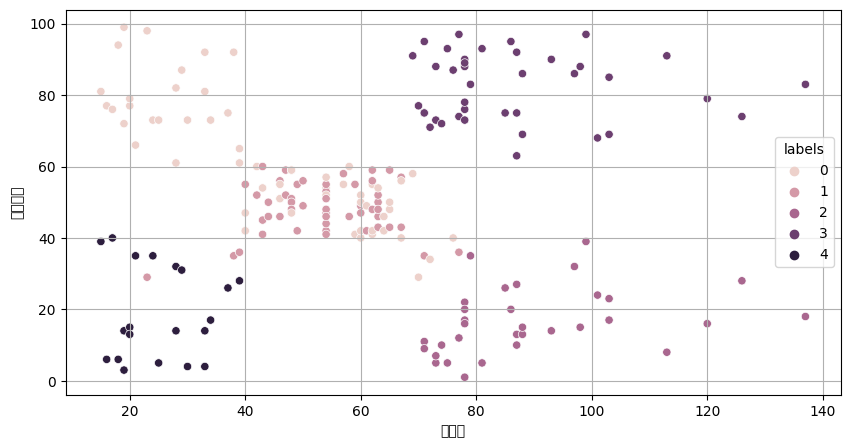

In [11]:
plt.figure(figsize=(10, 5))
#sb.scatterplot(x=n_data[:, 0], y=n_data[:, 1])
sb.scatterplot(data=origin, x='연수입', y='지출점수', hue='labels')
plt.grid()
plt.show()
plt.close()